# Final Project - Group 8

## Job Openings Analysis

### Importing Necessary Libraries

In [6]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Loading data 

In [7]:
job_postings = pd.read_csv("C:\\Users\\Karan\\OneDrive\\Desktop\\IST 652 Scripting\\final project\\job_posting_indeed.csv")  
sal=pd.read_csv("C:\\Users\\Karan\\OneDrive\\Desktop\\IST 652 Scripting\\final project\\sal.csv")  
salary_data = pd.read_csv("C:\\Users\\Karan\\OneDrive\\Desktop\\IST 652 Scripting\\final project\\ds_salaries.csv")   

### EDA

In [8]:
job_postings.head()

,job_title,company_name,location,post_Date,Qualifications,post_days_ago
0,Data Scientist,Lockheed Martin,"Raleigh, NC",25 days ago,Master's in Computer Science; Knowledge of mac...,25
1,Quantitative Analyst,Zebra Technologies,"Kansas City, MO",3 days ago,PhD in Statistics; Experience with Agile metho...,3
2,Research Scientist,Lyft,"Tampa, FL",8 days ago,Familiarity with cloud services; Knowledge of ...,8
3,Quantitative Analyst,RingCentral,"Houston, TX",5 days ago,Strong programming skills in Python; Experienc...,5
4,AI Researcher,Cisco,"Denver, CO",1 days ago,Familiarity with cloud services; Master's in C...,1


In [9]:

job_postings.isnull().sum()

job_title         0
company_name      0
location          0
post_Date         0
Qualifications    0
post_days_ago     0
dtype: int64

In [10]:
salary_data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


### Here we are filtering salary data for just USA data

In [11]:
salary_data_us = salary_data[salary_data['company_location'] == 'US']

In [12]:
# checking for null values
salary_data_us.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### Classifying experince level needed from qualification columns

In [ ]:
def classify_experience(qualifications):
    qualifications = qualifications.lower()

    # Entry-level keywords
    entry_level_keywords = [
        'junior', 'entry-level', 'trainee', 'assistant', 'associate', 
        '0-2 years', 'support', 'intern', 'recent graduate', 'learning opportunity', 
        'entry position', 'basic knowledge'
    ]
    
    # Mid-level keywords
    mid_level_keywords = [
        'specialist', 'analyst', 'coordinator', 'developer', '2-5 years', 
        'experienced', 'advanced knowledge', 'skilled', 'professional', 
        'manager', 'intermediate'
    ]
    
    # Senior-level keywords
    senior_level_keywords = [
        'senior', 'lead', 'expert', 'specialist', '5+ years', 'manager', 
        'team lead', 'director', 'advanced expertise', 'strategic leadership', 
        'decision-maker', 'ownership of projects'
    ]
    
    # Check for entry-level, mid-level, senior-level keywords
    if any(keyword in qualifications for keyword in entry_level_keywords):
        return 'EN'  # Entry-level
    elif any(keyword in qualifications for keyword in mid_level_keywords):
        return 'MI'  # Mid-level
    elif any(keyword in qualifications for keyword in senior_level_keywords):
        return 'SE'  # Senior-level

    # Degree-based inference
    if 'phd' in qualifications:
        return 'EX'  # Executive-level
    elif 'master' in qualifications:
        return 'MI' if '5+ years' not in qualifications else 'SE'
    elif 'bachelor' in qualifications or 'experince' not in qualifications:
        return 'EN'

    return 'Unknown'  # If no match is found






# Applying the function
job_postings['experience_level_needed'] = job_postings['Qualifications'].apply(classify_experience)



In [ ]:
#converting to csv
job_postings.to_csv("C:\\Users\\Karan\\OneDrive\\Desktop\\IST 652 Scripting\\final project\\job_postings_with_experince needed.csv", index=False)

In [15]:
#merging the job posting and sal dataste on job_title and experince level
merged_data = pd.merge(job_postings, sal, 
                       left_on=['job_title', 'experience_level_needed'], 
                       right_on=['job_title', 'experience_level'], 
                       how='inner')

merged_data.head()


,job_title,company_name,location,post_Date,Qualifications,post_days_ago,experience_level_needed,experience_level,salary_ex_level
0,Data Scientist,Lockheed Martin,"Raleigh, NC",25 days ago,Master's in Computer Science; Knowledge of mac...,25,MI,MI,476047.95030
1,Research Scientist,Lyft,"Tampa, FL",8 days ago,Familiarity with cloud services; Knowledge of ...,8,EN,EN,115777.77780
2,Data Analyst,HP,"Seattle, WA",11 days ago,Excellent problem-solving skills; Proficiency ...,11,MI,MI,116270.27540
3,Data Scientist,Boeing,"New Orleans, LA",21 days ago,Proficiency in data visualization tools; Knowl...,21,EN,EN,361651.79660
4,Data Analyst,General Motors,"Tampa, FL",19 days ago,Familiarity with cloud services; Knowledge of ...,19,EN,EN,76350.53968


In [16]:
# Checkimg fro merged dataset columns
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5285 entries, 0 to 5284
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   job_title                5285 non-null   object 
 1   company_name             5285 non-null   object 
 2   location                 5285 non-null   object 
 3   post_Date                5285 non-null   object 
 4   Qualifications           5285 non-null   object 
 5   post_days_ago            5285 non-null   int64  
 6   experience_level_needed  5285 non-null   object 
 7   experience_level         5285 non-null   object 
 8   salary_ex_level          5285 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 371.7+ KB


In [17]:
#choosing important columns from merged dataset
final_Data=merged_data[['job_title', 'company_name', 'location', 'post_Date', 
             'Qualifications', 'post_days_ago', 'experience_level_needed', 'salary_ex_level']]


In [18]:
#checking for null values
final_Data.isnull().sum()

job_title                  0
company_name               0
location                   0
post_Date                  0
Qualifications             0
post_days_ago              0
experience_level_needed    0
salary_ex_level            0
dtype: int64

### Analysis

### Top paying Job roles with average salary

In [ ]:
#Checking for salary group by job title
top_paying_jobs = final_Data.groupby('job_title')['salary_ex_level'].mean().sort_values(ascending=False).head(10)
top_paying_jobs.round(2)

job_title
Data Scientist               310820.22
Data Engineer                213456.66
Data Architect               160349.11
Research Scientist           126372.60
Machine Learning Engineer    123370.83
Data Analyst                  97139.29
Name: salary_ex_level, dtype: float64

In [20]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Karan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Top skills for Data Analytics role

Frequencies of Technical Skills for Data Analyst Role:
[('data', 368), ('cloud', 198), ('statistics', 198), ('machine', 191), ('learning', 191), ('visualization', 187), ('tools', 187), ('sql', 185), ('python', 184), ('big', 181), ('analysis', 167)]


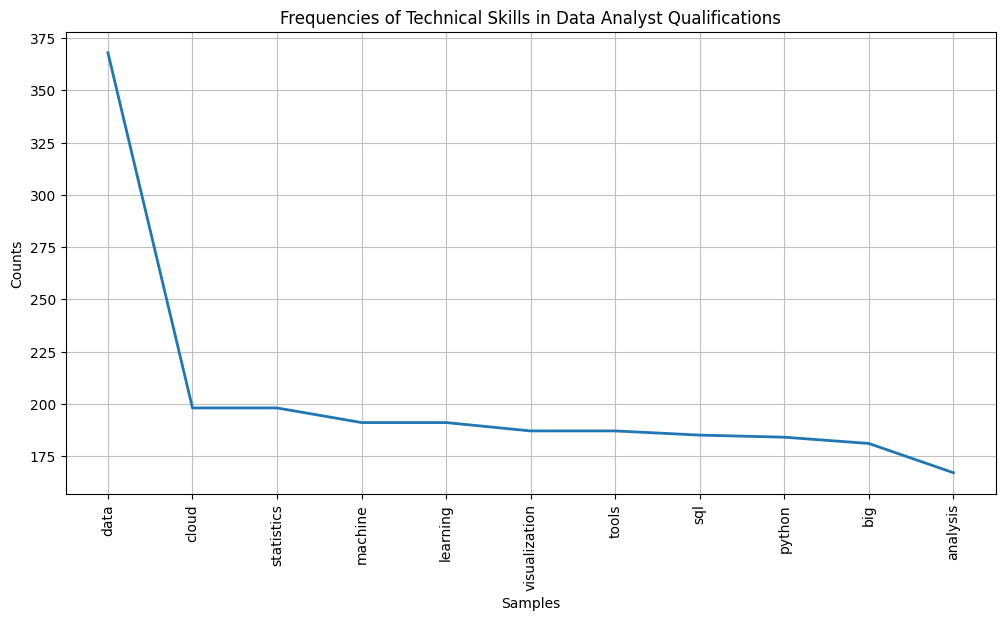

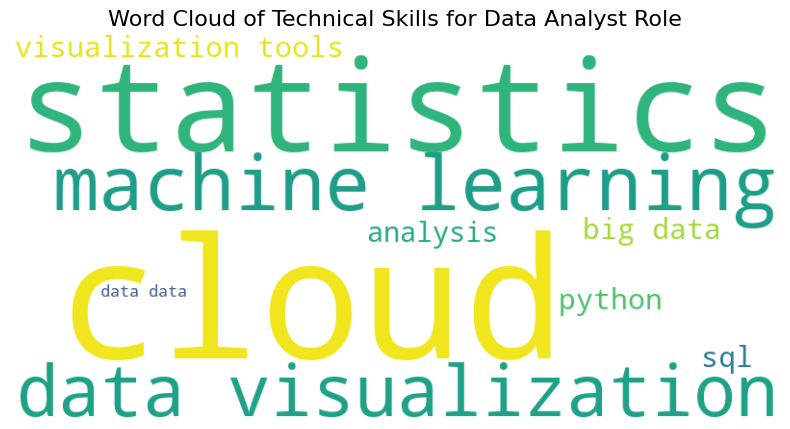

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extendeding list of technical skills
technical_skills = [
    "python", "sql", "r", "excel", "microsoft", "power", "bi", "tableau",
    "etl", "processes", "web", "scraping", "big", "data", "tools", "relational",
    "databases", "nosql", "statistics", "machine", "learning", "hadoop", "spark",
    "data analysis", "visualization", "aws", "cloud", "azure", "google cloud", 
    "bigquery", "apis", "dashboarding", "predictive modeling", "business intelligence"
]

# Spliting compound phrases into individual words
technical_skills_expanded = set(
    word for skill in technical_skills for word in skill.split()
)

# Filtering qualifications for Data Analyst role
data_analyst_qualifications = job_postings[job_postings['job_title'] == 'Data Analyst']['Qualifications'].dropna()

# Text preprocessing function
def preprocess_text(text):
    # Converting to lowercase
    text = text.lower()
    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenizing the text
    tokens = word_tokenize(text)
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

# Applying preprocessing to all qualifications for Data Analyst role
all_tokens = []
for text in data_analyst_qualifications:
    tokens = preprocess_text(text)
    all_tokens.extend(tokens)

# Filtering tokens to include only expanded technical skills
filtered_tokens = [token for token in all_tokens if token in technical_skills_expanded]

# Frequency distribution of technical skills
freq_dist_skills = FreqDist(filtered_tokens)

# Displaying the frequencies of technical skills
print("Frequencies of Technical Skills for Data Analyst Role:")
print(freq_dist_skills.most_common())

# Plotting the frequencies
plt.figure(figsize=(12, 6))
freq_dist_skills.plot(20, title="Frequencies of Technical Skills in Data Analyst Qualifications")

# Word Cloud for technical skills
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Technical Skills for Data Analyst Role", fontsize=16)
plt.show()


### Top skills for Data Scientist role

Frequencies of Technical Skills for Data Scientist Role:
[('data', 373), ('big', 198), ('technologies', 198), ('sql', 197), ('machine', 196), ('learning', 196), ('algorithms', 196), ('statistical', 182), ('analysis', 182), ('computer', 180), ('visualization', 175), ('statistics', 175), ('python', 150)]


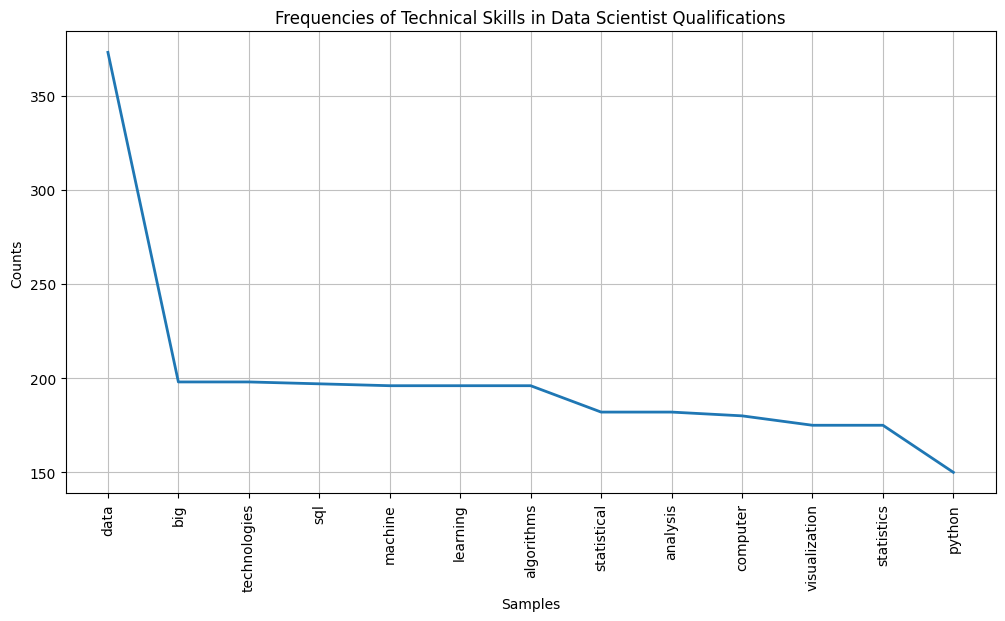

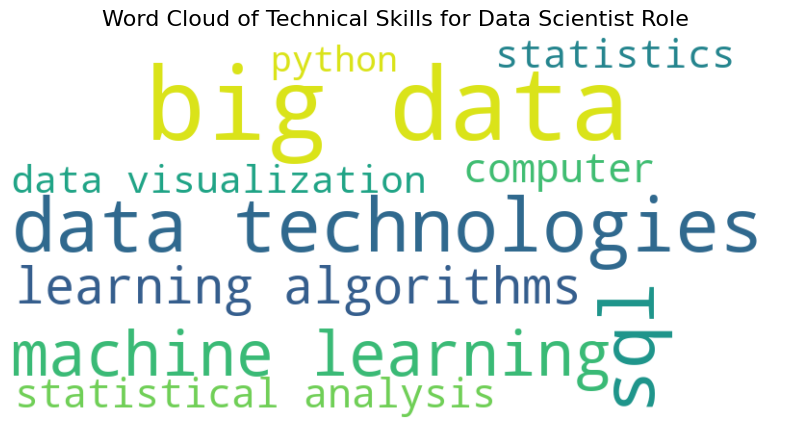

In [ ]:
job_postings_ds = job_postings[job_postings['job_title'] == 'Data Scientist']['Qualifications'].dropna()

# Preprocess the text function
def preprocess_text(text):
    # Converting to lowercase
    text = text.lower()
    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenizing the text
    tokens = word_tokenize(text)
    return tokens

# List of technical skills for Data Scientist 
technical_skills_ds_separated = [
    "python", "sql", "machine", "learning", "algorithms", "data", "visualization", 
    "statistics", "big", "data", "technologies", "data", "preprocessing", 
    "data", "analysis", "model", "deployment", "neural", "networks", 
    "deep", "learning", "nlp", "computer", "vision", "r", "hadoop", 
    "spark", "tableau", "power", "bi", "excel", "data", "mining", "clustering", 
    "regression", "feature", "engineering", "time", "series", "modeling", 
    "dimensionality", "reduction", "data", "wrangling", "statistical", "analysis",
    "data", "modeling", "python", "libraries", "tensorflow", "keras", "pandas", 
    "numpy", "scipy", "scikit-learn", "matplotlib", "seaborn"
]

# Collecting all tokens from the qualifications
all_tokens_ds = []
for text in job_postings_ds:
    tokens = preprocess_text(text)
    all_tokens_ds.extend(tokens)

# Filtering tokens to include only relevant technical skills for Data Scientist
filtered_tokens_ds = [token for token in all_tokens_ds if token.lower() in [skill.lower() for skill in technical_skills_ds_separated]]

# Frequency distribution for relevant technical skills
freq_dist_skills_ds = FreqDist(filtered_tokens_ds)

# Displaying the frequencies of technical skills
print("Frequencies of Technical Skills for Data Scientist Role:")
print(freq_dist_skills_ds.most_common())

# Plotting the frequencies of the top skills
plt.figure(figsize=(12, 6))
freq_dist_skills_ds.plot(20, title="Frequencies of Technical Skills in Data Scientist Qualifications")

# Generating a word cloud for the relevant technical skills
wordcloud_ds = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_tokens_ds))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_ds, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Technical Skills for Data Scientist Role", fontsize=16)
plt.show()


### Top skills for Machine Learning Engineer Role

Frequencies of Technical Skills for Machine Learning Engineer Role:
[('data', 383), ('agile', 209), ('methodologies', 209), ('statistical', 205), ('analysis', 205), ('sql', 201), ('big', 196), ('technologies', 196), ('programming', 196), ('python', 196), ('environment', 193), ('cloud', 187), ('services', 187), ('visualization', 187), ('machine', 186), ('learning', 186), ('algorithms', 186), ('statistics', 184), ('computer', 172)]


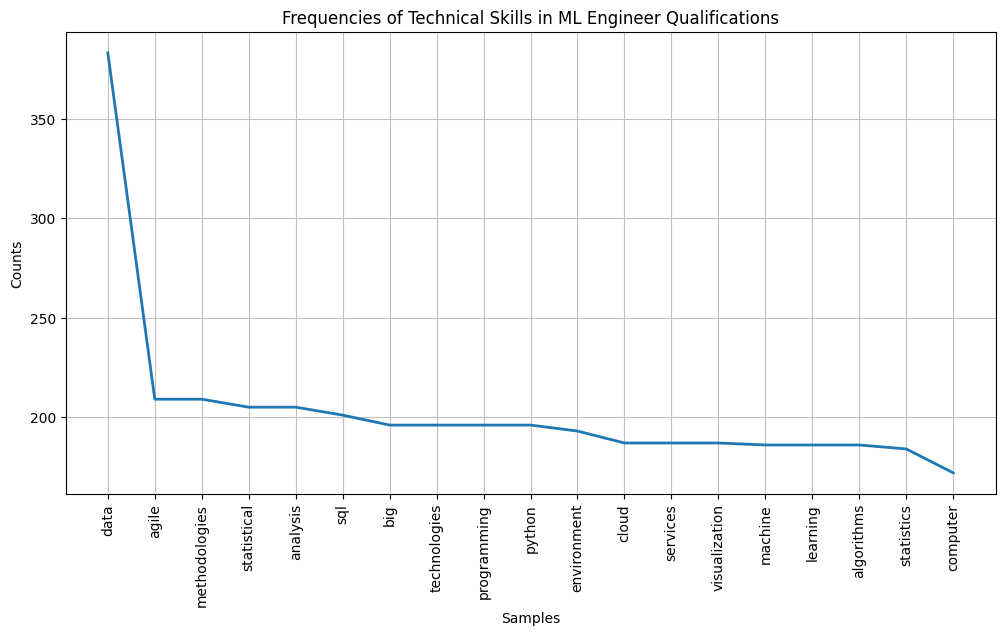

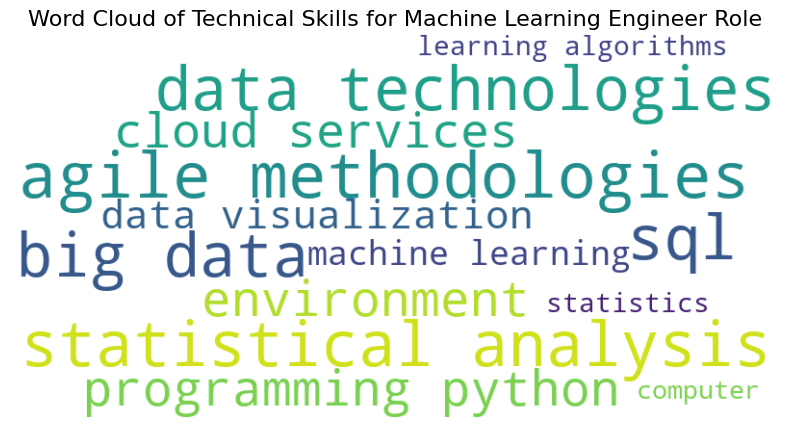

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#List of technical skills for Machine Learning Engineer
technical_skills_ml_separated = [
    "Python", "SQL", "Cloud", "services", "Agile", "methodologies", 
    "Statistics", "Data", "visualization", "Problem-solving", 
    "Machine", "learning", "algorithms", "Statistical", "analysis", 
    "Big", "data", "technologies", "Programming", "Teamwork", 
    "Fast-paced", "environment", "Neural", "networks", "Deep", "learning", 
    "Computer", "vision", "NLP", "Data", "preprocessing", 
    "Regression", "Clustering", "Model", "deployment"
]


# Job postings dataset filtered for Machine Learning Engineer
job_postings_ml = job_postings[job_postings['job_title'] == 'Machine Learning Engineer']['Qualifications'].dropna()

# Preprocess the text function
def preprocess_text(text):
    # Converting to lowercase
    text = text.lower()
    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenizing the text
    tokens = word_tokenize(text)
    return tokens

# Collecting all tokens from the qualifications
all_tokens = []
for text in job_postings_ml:
    tokens = preprocess_text(text)
    all_tokens.extend(tokens)

# Filtering tokens to include only relevant technical skills
filtered_tokens = [token for token in all_tokens if token.lower() in [skill.lower() for skill in technical_skills_ml_separated]]

# Frequency distribution for relevant technical skills
freq_dist_skills = FreqDist(filtered_tokens)

# Displaying the frequencies of technical skills
print("Frequencies of Technical Skills for Machine Learning Engineer Role:")
print(freq_dist_skills.most_common())

# Plotting the frequencies
plt.figure(figsize=(12, 6))
freq_dist_skills.plot(20, title="Frequencies of Technical Skills in ML Engineer Qualifications")

# Word Cloud for technical skills
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Technical Skills for Machine Learning Engineer Role", fontsize=16)
plt.show()


## Loactaions which have most job postings

The location with the most job openings is: Atlanta, GA with 239 openings.


<Figure size 1200x600 with 0 Axes>

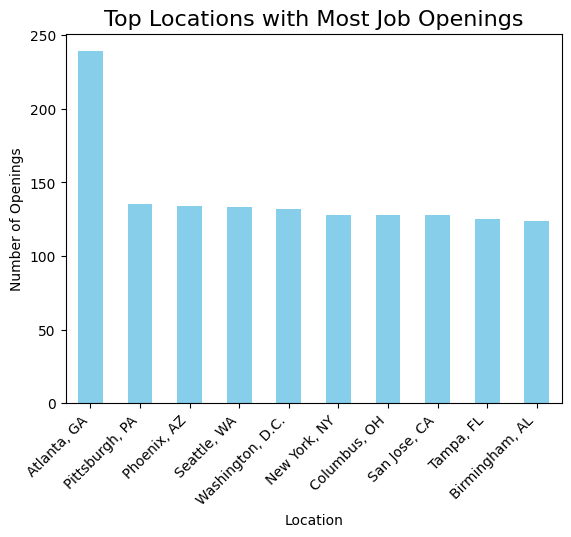

In [ ]:
# Group by location and count the number of job postings for each location
location_counts = final_Data['location'].value_counts().reset_index()

# Renaming columns for clarity
location_counts.columns = ['Location', 'Number of Openings']

# Displaying the location with the most job openings
top_location = location_counts.iloc[0]

# Printing the result
print(f"The location with the most job openings is: {top_location['Location']} with {top_location['Number of Openings']} openings.")

# Plotting a bar chart for locations with most openings
plt.figure(figsize=(12, 6))
location_counts.head(10).plot(kind='bar', x='Location', y='Number of Openings', legend=False, color='skyblue')
plt.title('Top Locations with Most Job Openings', fontsize=16)
plt.xlabel('Location')
plt.ylabel('Number of Openings')
plt.xticks(rotation=45, ha='right')
plt.show()


## Locations which have most job openings for each job title

In [ ]:
# Group by job title and location, then count the number of job postings for each combination
job_location_counts = final_Data.groupby(['job_title', 'location']).size().reset_index(name='Number of Openings')

# For each job title, finding the location with the maximum number of openings
top_locations_per_job = job_location_counts.loc[job_location_counts.groupby('job_title')['Number of Openings'].idxmax()]

# Displaying the result
print("Location with most job openings for each role:")
print(top_locations_per_job[['job_title', 'location', 'Number of Openings']])

Location with most job openings for each role:
                     job_title     location  Number of Openings
0                 Data Analyst  Atlanta, GA                  36
45              Data Architect  Atlanta, GA                  21
90               Data Engineer  Atlanta, GA                  53
135             Data Scientist  Atlanta, GA                  50
180  Machine Learning Engineer  Atlanta, GA                  35
225         Research Scientist  Atlanta, GA                  44


## Top 5 locations which have most job openings for Data Analyst role with count of openings

Top 5 Locations with Most Job Openings for Data Analyst:
            location  Number of Openings
0        Atlanta, GA                  36
30  Philadelphia, PA                  30
31       Phoenix, AZ                  30
6        Chicago, IL                  29
22     Milwaukee, WI                  27


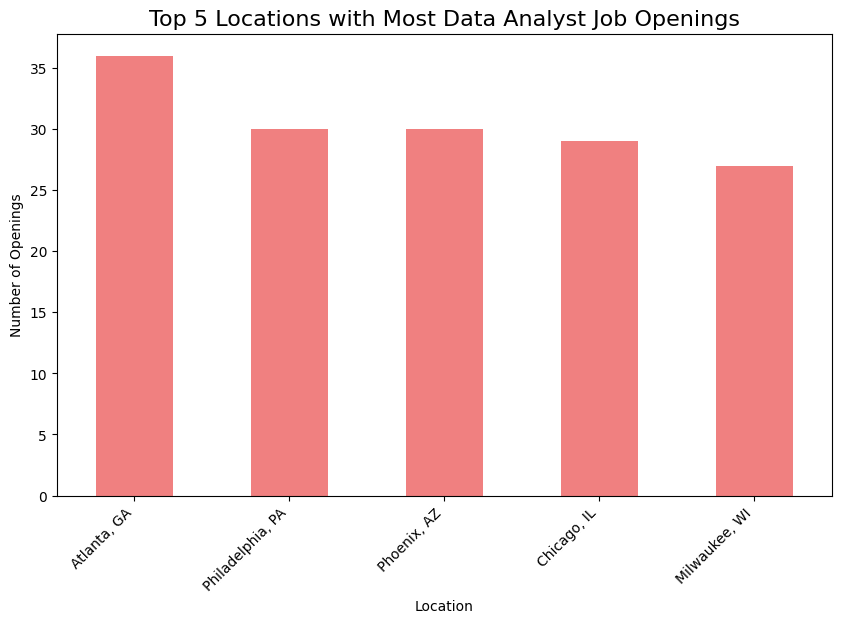

In [ ]:
# Filtering the data for Data Analyst roles
data_analyst_data = final_Data[final_Data['job_title'] == 'Data Analyst']

# Group by location and count the number of job postings for each location
location_counts = data_analyst_data.groupby('location').size().reset_index(name='Number of Openings')

# Sorting by number of openings in descending order and get the top 5 locations
top_5_locations = location_counts.sort_values(by='Number of Openings', ascending=False).head(5)

# Displaying the top 5 locations with the most openings for Data Analyst
print("Top 5 Locations with Most Job Openings for Data Analyst:")
print(top_5_locations)

# Plot a bar chart for these locations
plt.figure(figsize=(10, 6))
top_5_locations.set_index('location')['Number of Openings'].plot(kind='bar', color='lightcoral')
plt.title('Top 5 Locations with Most Data Analyst Job Openings', fontsize=16)
plt.xlabel('Location')
plt.ylabel('Number of Openings')
plt.xticks(rotation=45, ha='right')
plt.show()


## Top 5 locations which have most job openings for Data Scientist role with count of openings

Top 5 Locations with Most Job Openings for Data Analyst:
        location  Number of Openings
0    Atlanta, GA                  50
31   Phoenix, AZ                  32
27  New York, NY                  30
12   Detroit, MI                  29
11    Denver, CO                  28


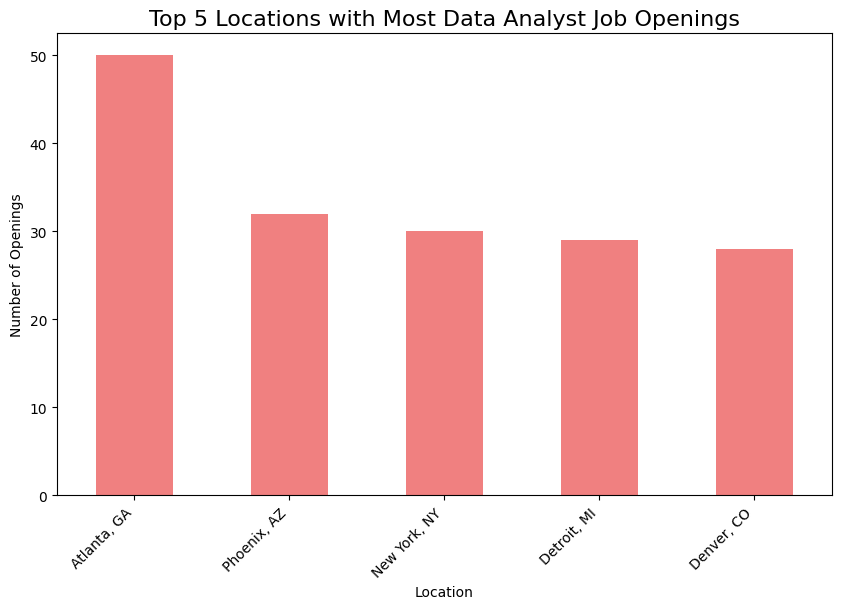

In [38]:
# Filtering the data for Data Analyst roles
data_scientist_data = final_Data[final_Data['job_title'] == 'Data Scientist']

# Group by location and count the number of job postings for each location
location_counts = data_scientist_data.groupby('location').size().reset_index(name='Number of Openings')

# Sorting by number of openings in descending order and get the top 5 locations
top_5_locations = location_counts.sort_values(by='Number of Openings', ascending=False).head(5)

# Displaying the top 5 locations with the most openings for Data Analyst
print("Top 5 Locations with Most Job Openings for Data Analyst:")
print(top_5_locations)

# Plot a bar chart for these locations
plt.figure(figsize=(10, 6))
top_5_locations.set_index('location')['Number of Openings'].plot(kind='bar', color='lightcoral')
plt.title('Top 5 Locations with Most Data Analyst Job Openings', fontsize=16)
plt.xlabel('Location')
plt.ylabel('Number of Openings')
plt.xticks(rotation=45, ha='right')
plt.show()

## Top 5 locations which have most job openings for each role with count of openings

In [ ]:
# Geting the top 5 locations for each job role based on job count
top_locations = final_Data.groupby(['job_title', 'location']).size().reset_index(name='job_count')

# Sorting values by job count in descending order and pick top 5 for each role
top_locations_sorted = top_locations.sort_values(['job_title', 'job_count'], ascending=[True, False])

# Extracting the top 5 for each job role
top_5_locations_per_role = top_locations_sorted.groupby('job_title').head(5)

# Displaying the top 5 locations for each job role
print("Top 5 Locations for Each Job Role:")
print(top_5_locations_per_role)


Top 5 Locations for Each Job Role:
                     job_title            location  job_count
0                 Data Analyst         Atlanta, GA         36
30                Data Analyst    Philadelphia, PA         30
31                Data Analyst         Phoenix, AZ         30
6                 Data Analyst         Chicago, IL         29
22                Data Analyst       Milwaukee, WI         27
45              Data Architect         Atlanta, GA         21
53              Data Architect       Cleveland, OH         16
80              Data Architect      Sacramento, CA         16
49              Data Architect          Boston, MA         14
62              Data Architect     Kansas City, MO         14
90               Data Engineer         Atlanta, GA         53
100              Data Engineer          Dallas, TX         29
126              Data Engineer  Salt Lake City, UT         29
130              Data Engineer         Seattle, WA         29
93               Data Engineer     

## Top 5 companies which have most openings with count of openings

In [ ]:
# Group by company name and count the number of job roles for each company
company_job_count = final_Data.groupby('company_name').size().reset_index(name='job_count')

# Sorting the companies by the job count in descending order
company_job_count_sorted = company_job_count.sort_values(by='job_count', ascending=False)

# Geting the top 5 companies with most roles
top_5_companies = company_job_count_sorted.head(5)

# Displaying the top 5 companies
print("Top 5 Companies with Most Job Roles:")
print(top_5_companies)



Top 5 Companies with Most Job Roles:
   company_name  job_count
65   Salesforce        122
69       Square        116
37    Honeywell        114
26      Danaher         83
70    Starbucks         81


### Top skills for Salesforce Company

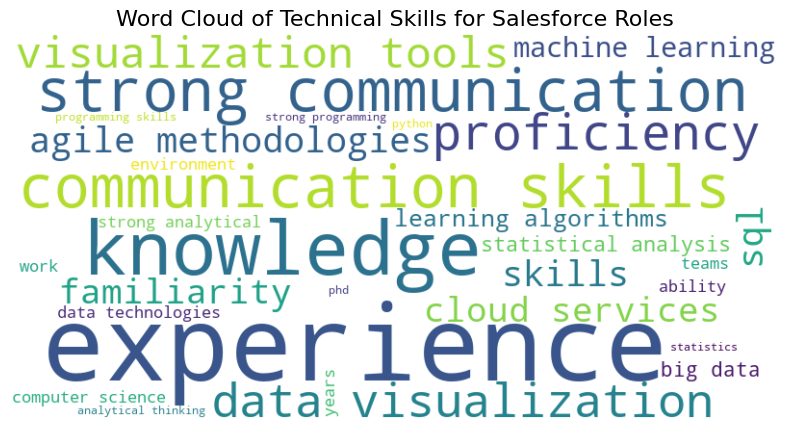

In [ ]:
technical_skills_salesforce_separated = [
    "Big", "Data", "Technologies", 
    "Statistical", "Analysis", "SQL", 
    "Master's", "in", "Computer", "Science", 
    "Data", "Visualization", "Tools", 
    "Problem-solving", "Skills", "Agile", "Methodologies", 
    "Cloud", "Services", "Analytical", "Thinking", 
    "Python", "Programming", "Machine", "Learning", "Algorithms", 
    "5+", "Years", "of", "Experience", "Communication", "Skills", 
    "Ability", "to", "Work", "in", "Teams", "Fast-paced", "Environment", 
    "PhD", "in", "Statistics", "Experience", "with", "SQL", 
    "Experience", "with", "Big", "Data", "Technologies", "Experience", 
    "with", "Agile", "Methodologies", "Strong", "Programming", 
    "Skills", "in", "Python", "Proficiency", "in", "Data", "Visualization", 
    "Tools", "Knowledge", "of", "Statistical", "Analysis", "Knowledge", 
    "of", "Machine", "Learning", "Algorithms", "Experience", 
    "in", "a", "Fast-paced", "Environment", "Familiarity", 
    "with", "Cloud", "Services"
]

# Filter job postings for Salesforce-related roles (adjust the job title if necessary)
job_postings_salesforce = job_postings[job_postings['company_name'] == 'Salesforce']['Qualifications'].dropna()

# Preprocess the text function
def preprocess_text(text):
    # Converting to lowercase
    text = text.lower()
    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenizing the text
    tokens = word_tokenize(text)
    return tokens

# Collecting all tokens from the qualifications
all_tokens_salesforce = []
for text in job_postings_salesforce:
    tokens = preprocess_text(text)
    all_tokens_salesforce.extend(tokens)

# Filtering tokens to include only relevant technical skills for Salesforce-related roles
filtered_tokens_salesforce = [token for token in all_tokens_salesforce if token.lower() in [skill.lower() for skill in technical_skills_salesforce_separated]]

# Frequency distribution for relevant technical skills
freq_dist_skills_salesforce = FreqDist(filtered_tokens_salesforce)

# Generating a word cloud for the relevant technical skills
wordcloud_salesforce = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_tokens_salesforce))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_salesforce, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Technical Skills for Salesforce Roles", fontsize=16)
plt.show()


## Top 5 companies which have most openings for Data Analyst role

In [ ]:
# Filtering the data to include only rows where the job role is 'Data Analyst'
data_analyst_jobs = final_Data[final_Data['job_title'] == 'Data Analyst']

# Group by company name and count the number of 'Data Analyst' job roles for each company
company_data_analyst_count = data_analyst_jobs.groupby('company_name').size().reset_index(name='job_count')

# Sorting the companies by the job count in descending order
company_data_analyst_count_sorted = company_data_analyst_count.sort_values(by='job_count', ascending=False)

# Geting the top 5 companies with the most 'Data Analyst' roles
top_5_data_analyst_companies = company_data_analyst_count_sorted.head(5)

# Displaying the top 5 companies
print("Top 5 Companies with Most 'Data Analyst' Job Roles:")
print(top_5_data_analyst_companies)


Top 5 Companies with Most 'Data Analyst' Job Roles:
   company_name  job_count
69       Square         22
65   Salesforce         21
46       Lowe's         19
30   Ford Motor         18
37    Honeywell         18


## Salary by company size for each job role

In [ ]:
# Group the data by job role and company size, then calculate the mean salary
salary_by_role_and_size = salary_data_us.groupby(['job_title', 'company_size'])['salary_in_usd'].mean().reset_index()

# Sorting the data within each job role for better visualization
salary_by_role_and_size = salary_by_role_and_size.sort_values(['job_title', 'company_size'], ascending=[True, False])

# Displaing the top results
salary_by_role_and_size.round(2)

,job_title,company_size,salary_in_usd
0,AI Developer,M,200000.00
3,AI Scientist,S,106000.00
2,AI Scientist,M,95500.00
1,AI Scientist,L,200000.00
6,Analytics Engineer,S,48000.00
...,...,...,...
111,Research Engineer,M,168156.58
114,Research Scientist,S,50000.00
113,Research Scientist,M,183235.47
112,Research Scientist,L,157250.00


## Salary by employment type for each job role

In [33]:
# Grouping by job title and employment type, then calculating the average salary
salary_by_employment_type = salary_data_us.groupby(['job_title', 'employment_type'])['salary_in_usd'].mean().reset_index()

# Sorting the data for better readability
salary_by_employment_type = salary_by_employment_type.sort_values(by=['job_title', 'employment_type'], ascending=[True, False])

# Display the top records
print(salary_by_employment_type.round(2))


                              job_title employment_type  salary_in_usd
0                          AI Developer              FT      200000.00
2                          AI Scientist              PT       12000.00
1                          AI Scientist              FT      154000.00
3                    Analytics Engineer              FT      159024.35
4                Applied Data Scientist              FT      238000.00
..                                  ...             ...            ...
77  Principal Machine Learning Engineer              FT      190000.00
78                 Product Data Analyst              FT      120000.00
79                    Research Engineer              FT      168156.58
80                   Research Scientist              FT      179146.21
81                 Staff Data Scientist              CT      105000.00

[82 rows x 3 columns]


### Salary Trends

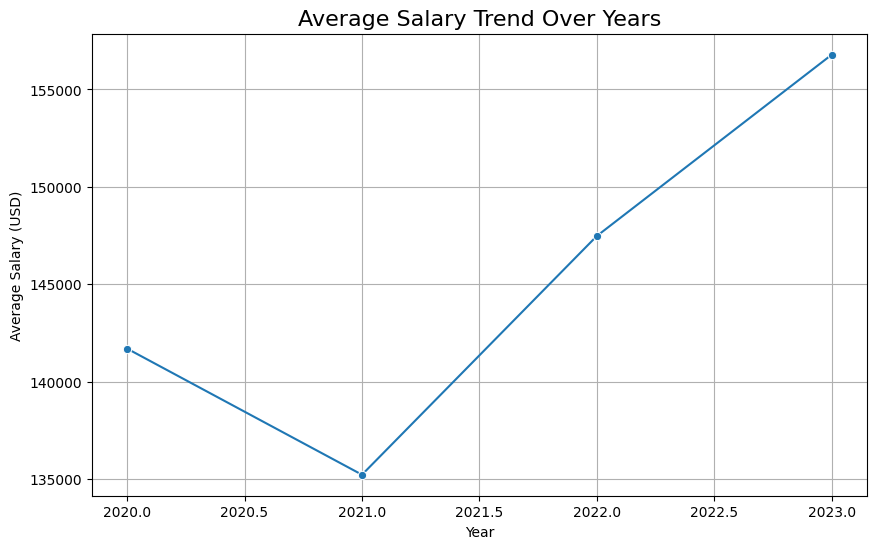

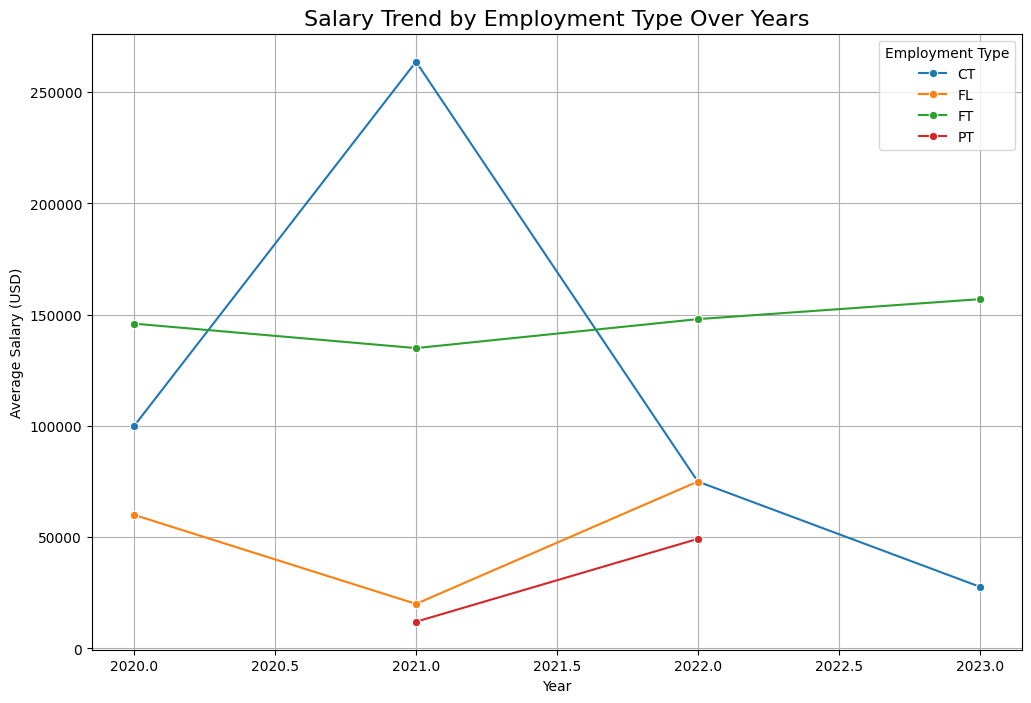

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping salaries by work year
salary_trends = salary_data_us.groupby('work_year')['salary_in_usd'].mean().reset_index()

# Plotting the trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=salary_trends, x='work_year', y='salary_in_usd', marker='o')
plt.title('Average Salary Trend Over Years', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.grid(True)
plt.show()

# Trend analysis by employment type
employment_salary_trends = salary_data_us.groupby(['work_year', 'employment_type'])['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=employment_salary_trends, x='work_year', y='salary_in_usd', hue='employment_type', marker='o')
plt.title('Salary Trend by Employment Type Over Years', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.legend(title='Employment Type')
plt.grid(True)
plt.show()



C:\Users\Karan\AppData\Local\Temp\ipykernel_17332\3975893658.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['work_year'] = pd.to_datetime(df['work_year'], format='%Y')


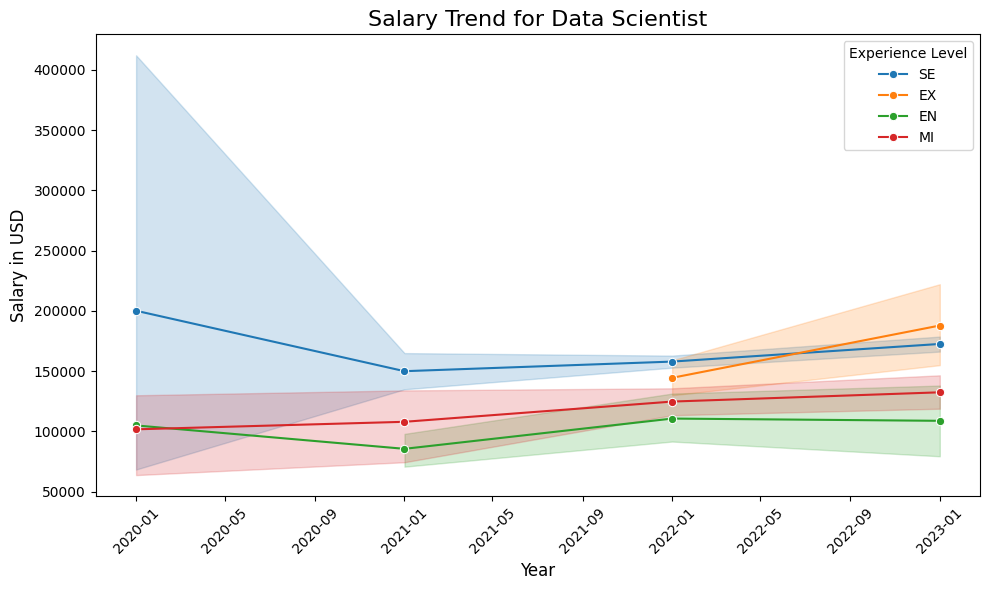

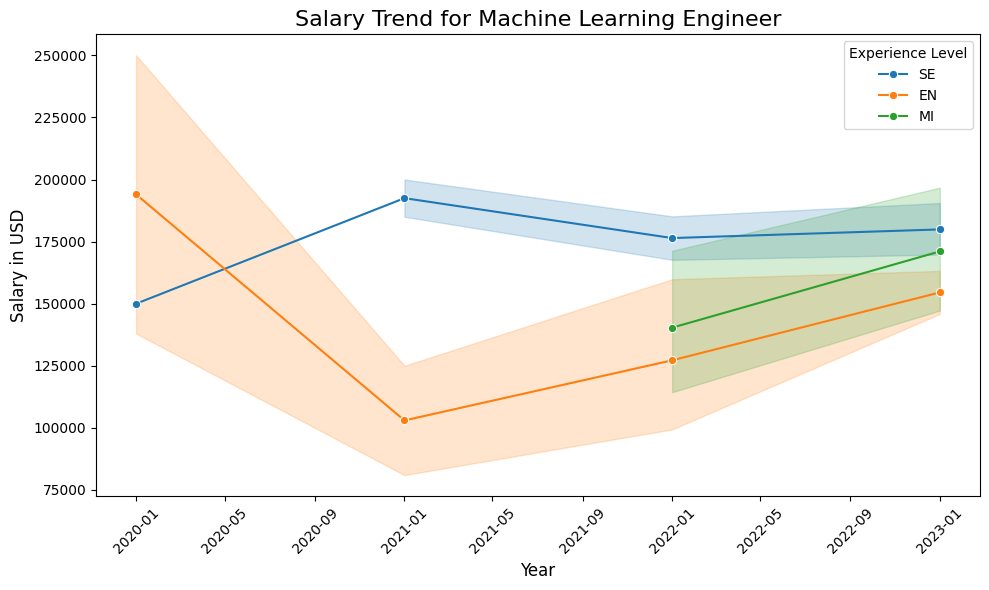

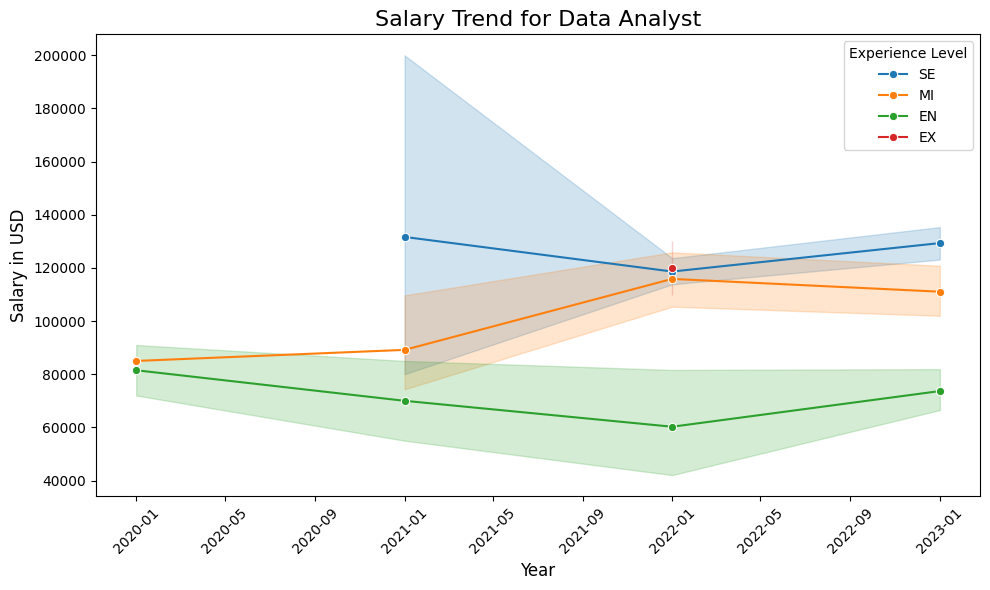

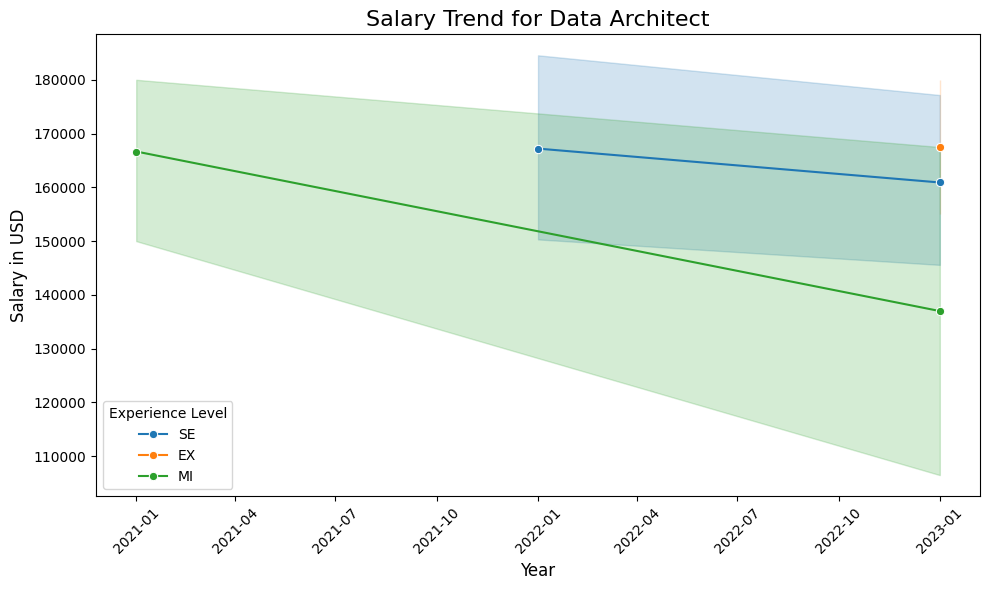

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = salary_data_us # Replace with the correct path to your dataset

# Converting 'work_year' to datetime (if it's not already)
df['work_year'] = pd.to_datetime(df['work_year'], format='%Y')

# Defining the specific emerging job titles you're interested in
emerging_jobs = ['Data Scientist', 'Machine Learning Engineer', 'Data Analyst', 'Data Architect']

# Filtering the dataframe to include only these jobs
df_emerging_jobs = df[df['job_title'].isin(emerging_jobs)]

# Creating a plot for each emerging job role
for job in emerging_jobs:
    job_data = df_emerging_jobs[df_emerging_jobs['job_title'] == job]
    
    # Plotting the salary trend over years for each job role
    plt.figure(figsize=(10,6))
    sns.lineplot(data=job_data, x='work_year', y='salary_in_usd', hue='experience_level', marker='o')
    plt.title(f'Salary Trend for {job}', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Salary in USD', fontsize=12)
    plt.legend(title='Experience Level')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



In [37]:
remote_salary = salary_data_us.groupby('remote_ratio')['salary_in_usd'].mean()
remote_salary.round(2)

remote_ratio
0      153151.83
50     133993.92
100    150690.27
Name: salary_in_usd, dtype: float64